In [1]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

# for pretty printing
np.set_printoptions(4, linewidth=100, suppress=True)

## Chapter 5

We have spent a lot of time and effort to develop a theoretical establishment of the singular value decomposition (SVD).

In this session, we will instead give you a geometric, hand-wavy introduction to the SVD, hopefully giving you a new insight by showing a different approach.


Let us start with the following geometric fact:

> For any matrix $A \in \mathbb{R}^{n \times m}$, the image of an $n$-dimensional sphere in $\mathbb{R}^n$ is an ellipsoid $\mathcal{E}$ in $\mathbb{R}^m$.

We allow the ellipsoid $\mathcal{E}$ to be "dimension-deficient". That is, a flat $2$-dimensional ellipse, or even a line segment, are possible ellipsoids in $\mathbb{R}^3$.




In [2]:
rng = np.random.RandomState(1)
A = rng.randn(2, 2)
print("A = ")
print(A)

A = 
[[ 1.6243 -0.6118]
 [-0.5282 -1.073 ]]


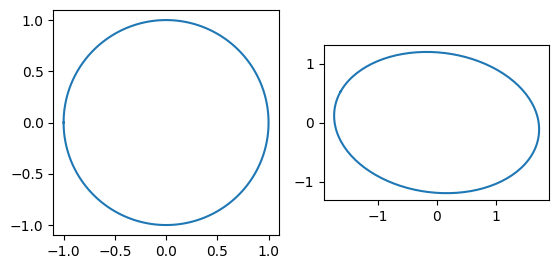

In [3]:
t = np.linspace(-np.pi, np.pi, 181)
x = np.cos(t)
y = np.sin(t)

fig, axs = plt.subplots(1, 2)
ax0 = axs[0]
ax0.plot(x, y)
ax0.set_aspect('equal')

z = np.vstack((x, y))
w = A @ z
u = w[0, :]
v = w[1, :]
ax1 = axs[1]
ax1.plot(u, v)
ax1.set_aspect('equal')
plt.show()

An ellipsoid $\mathcal{E}$ in $\mathbb{R}^m$ is a geometric shape which can be obtained by the following steps.  

1.   Start with an $m$-dimensional sphere.
2.   Choose mutually orthogonal directions $\{\mathbf{u}_1, \dots, \mathbf{u}_m\}$ in $\mathbb{R}^m$.
3.   Stretch the sphere along each axes $\mathbf{u}_i$ by a factor of $\sigma_i$. We allow $\sigma_i$ to be $0$.

By doing so, the vectors $\{\sigma_1\mathbf{u}_1, \dots, \sigma_m\mathbf{u}_m\}$ become the semiaxes of the ellipsoid.


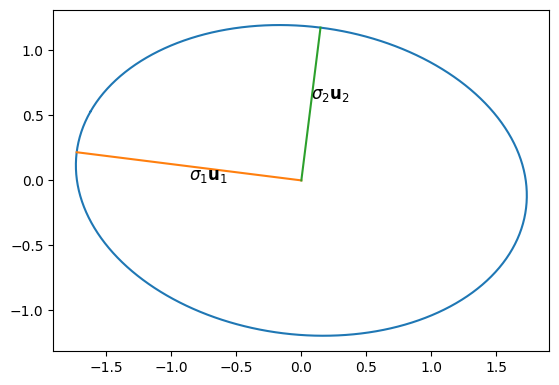

In [4]:
fig, ax = plt.subplots()
x = np.cos(np.linspace(-np.pi, np.pi, 181))
y = np.sin(np.linspace(-np.pi, np.pi, 181))

z = np.vstack((x, y))
w = A @ z
s = w[0, :]
t = w[1, :]
ax.plot(s, t)
ax.set_aspect('equal')

# Why we are suddenly computing the SVD here will be soon clear.
U, S, Vt = np.linalg.svd(A)
u0 = S[0] * U[:, 0]
u1 = S[1] * U[:, 1]

ax.plot([0, u0[0]], [0, u0[1]])
ax.plot([0, u1[0]], [0, u1[1]])

# Adding annotations to the plot.
ax.text(0.5*u0[0], 0.5*u0[1], r"$\sigma_1 \mathbf{u}_1$", ha='left', va='top', fontsize=12)
ax.text(0.5*u1[0], 0.5*u1[1], r"$\sigma_2 \mathbf{u}_2$", ha='left', va='bottom', fontsize=12)
ax.set_aspect('equal')
plt.show()

Say $\operatorname{rank}(A) = r$. This means that the image of $A$, or $\operatorname{range}(A)$, is an $r$-dimensional space. Then, the ellipsoid $\mathcal{E}$ in $\mathbb{R}^{m}$ will be an $r$-dimensional ellipsoid, having $r$ "non-flat" directions while being "flat" along $m-r$ orthogonal directions.

Now, let us reorder $\sigma_1, \dots, \sigma_m$ so that
\begin{align*}
    \sigma_1\geq \dots \geq \sigma_r > \sigma_{r+1} = 0 = \dots = \sigma_m
\end{align*} so that $\sigma_i \mathbf{u}_i$ is the $i$-th longest semiaxis of $\mathcal{E}$.

Because $\sigma_i \mathbf{u}_i$ is a point in the *image* of the $n$-dimensional sphere under the linear transform $A$, we should be able to find a vector $\mathbf{v}_i \in \mathbb{R}^n$ such that $A \mathbf{v}_i = \sigma_i \mathbf{u}_i$, especially when $1 \leq i \leq r$.

The nontrivial—and even somewhat magical—fact provided by SVD is that $\{\mathbf{v}_1, \dots \mathbf{v}_r\}$ also can be chosen as an orthonormal set.  

(While it is somewhat involved, it is possible to prove that $\{\mathbf{v}_1, \dots \mathbf{v}_r\}$ is orthonormal without prior knowledge of SVD.)

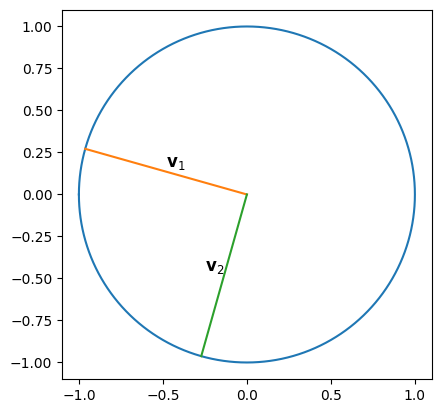

In [5]:
# In the case depicted above, A is invertible, so v_1 and v_2 can be found easily.
v0 = np.linalg.inv(A) @ u0
v1 = np.linalg.inv(A) @ u1

fig, ax = plt.subplots()
x = np.cos(np.linspace(-np.pi, np.pi, 181))
y = np.sin(np.linspace(-np.pi, np.pi, 181))
ax.plot(x, y)

ax.plot([0, v0[0]], [0, v0[1]])
ax.plot([0, v1[0]], [0, v1[1]])

# Adding annotations to the plot.
ax.text(0.5*v0[0], 0.5*v0[1], r"$\mathbf{v}_1$", ha='left', va='bottom', fontsize=12)
ax.text(0.5*v1[0], 0.5*v1[1], r"$\mathbf{v}_2$", ha='right', va='bottom', fontsize=12)
ax.set_aspect('equal')
plt.show()

In [6]:
# sanity check
print(v0, v1)  # right singular vectors obtained from left singular vectors
print(Vt)  # columns are right singular vectors

[-0.9624  0.2717] [-0.2717 -0.9624]
[[-0.9624  0.2717]
 [-0.2717 -0.9624]]


The relations $A \mathbf{v}_i = \sigma_i \mathbf{u}_i$ can be written in the block form  
\begin{align*}
\left[\begin{array}{ccccc}
    &&&& \\ &&& \\ &&{A}&& \\ &&&& \\ &&&&
\end{array}\right]\left[\begin{array}{c|c|c|c}
    &&& \\
    \mathbf{v}_1 & \mathbf{v}_2 & \cdots & \mathbf{v}_r \\
    &&&  
\end{array}\right] = \left[\begin{array}{c|c|c|c}
    &&& \\ &&& \\ \mathbf{u}_1&\mathbf{u}_2&\cdots&\mathbf{u}_r \\ &&& \\ &&&
\end{array}\right]
\left[\begin{array}{cccc}
    \sigma_1&&& \\ &\sigma_2&& \\ &&\ddots& \\ &&&\sigma_r
\end{array}\right] .
\end{align*}

Suppose that $n = r$, which is often the case for real-world applications using big data. Then, thanks to the magical property of $\{\mathbf{v}_1, \dots \mathbf{v}_r\}$ being orthonormal, for
\begin{align*}
V = \left[\begin{array}{c|c|c|c}
    &&& \\
    \mathbf{v}_1 & \mathbf{v}_2 & \cdots & \mathbf{v}_r \\
    &&&  
\end{array}\right]
\end{align*}

it holds that $VV^\top = I$, so multiplying $V^\top$ above on both sides we get
\begin{align*}
\left[\begin{array}{ccccc}
    &&&& \\ &&& \\ &&{A}&& \\ &&&& \\ &&&&
\end{array}\right] = \left[\begin{array}{c|c|c|c}
    &&& \\ &&& \\ \mathbf{u}_1&\mathbf{u}_2&\cdots&\mathbf{u}_r \\ &&& \\ &&&
\end{array}\right]
\left[\begin{array}{cccc}
    \sigma_1&&& \\ &\sigma_2&& \\ &&\ddots& \\ &&&\sigma_r
\end{array}\right] \left[\begin{array}{ccc}
     &\mathbf{v}_1^\top& \\ \hline
     &\mathbf{v}_2^\top& \\ \hline   
     & \vdots \\ \hline
     & \mathbf{v}_r^\top &
\end{array}\right] .
\end{align*}

Notice that we have just recovered the SVD of $A$.

&nbsp;

The case when $n > r$ can also be dealt similarly, but for those cases, considering the **full** SVD might be a more (theoretically) natural approach. We will soon see what full SVD is below.

---

#### SVD as a sum of rank-$1$ matrices

By some direct computation, one should be able to verify that, for
\begin{align*}
U = \left[\begin{array}{c|c|c|c}
    &&& \\ &&& \\ \mathbf{u}_1&\mathbf{u}_2&\cdots&\mathbf{u}_r \\ &&& \\ &&&
\end{array}\right]
\quad \text{ and } \quad
V = \left[\begin{array}{c|c|c|c}
    &&& \\
    \mathbf{v}_1 & \mathbf{v}_2 & \cdots & \mathbf{v}_r \\
    &&&  
\end{array}\right],
\end{align*}

regardless of the orthogonality of the column vectors, and for any $S \in \mathbb{R}^{r\times r}$, it holds that
\begin{align}
U S V^\top = \sum_{i=1}^r \sum_{j=1}^r (S)_{ij} \mathbf{u}_i \mathbf{v}_j. \tag{*}
\end{align}

&nbsp;

SVD is a very special case of the above, allowing us to represent a matrix $A$ into a sum of $r$ rank-1 matrices
\begin{align*}
A = U \Sigma V^\top = \sum_{i=1}^r \sigma_{i} \mathbf{u}_i \mathbf{v}_i
\end{align*} with each of $\{\mathbf{u}_1, \dots, \mathbf{u}_r\}$ and $\{\mathbf{v}_1, \dots, \mathbf{v}_r\}$   ortho**normal**.

Now we have a *geometric* interpretation of the best-fit properies of SVD.

Suppose we want to approximate the $r$-dimensional ellipsoid $\mathcal{E}$ by a $k$-dimensional ellipsoid $\mathcal{E}'$. Then, the best way to achieve it will be to make $\mathcal{E}'$ have $\{\sigma_1 \mathbf{u}_1, \dots, \sigma_k \mathbf{u}_k\}$ as its semiaxes, which are also the $k$ most significant semiaxes of $\mathcal{E}$ (although here we would need a sound definition for the goodness of the approximation).

By repeating the process of recovering the SVD of $A$ but now only using $\{\sigma_1 \mathbf{u}_1, \dots, \sigma_k \mathbf{u}_k\}$ instead of $\{\sigma_1 \mathbf{u}_1, \dots, \sigma_n \mathbf{u}_n\}$, our geometric intuition tells us that the best rank-$k$ approximation of $A$ is $A_k = \sum_{i=1}^k \sigma_i \mathbf{u}_i \mathbf{v}_i$.

---

#### Full SVD and Reduced SVD

Let us extend $\{\mathbf{u}_1, \dots, \mathbf{u}_r\}$ into an orthonormal basis $\{\mathbf{u}_1, \dots, \mathbf{u}_n\}$ of $\mathbb{R}^n$.

Similarly, let us extend $\{\mathbf{v}_1, \dots, \mathbf{v}_r\}$ into an orthonormal basis $\{\mathbf{v}_1, \dots, \mathbf{v}_m\}$ of $\mathbb{R}^m$.

Then for matrices
\begin{align*}
\tilde{U} = \left[\begin{array}{c|c|c|c}
    &&& \\ &&& \\ \mathbf{u}_1&\mathbf{u}_2&\cdots&\mathbf{u}_n \\ &&& \\ &&&
\end{array}\right],  \quad
\tilde{\Sigma} = \left[\begin{array}{c|c }
    \Sigma & \boldsymbol{0} \\ \hline \boldsymbol{0} & \boldsymbol{0}
\end{array}\right],
\quad \text{ and } \quad
\tilde{V} = \left[\begin{array}{c|c|c}
    && \\
    \mathbf{v}_1 & \cdots & \mathbf{v}_m\\
    &&
\end{array}\right],
\end{align*}

from $(\text{*})$ it is clear that $A = \tilde{U} \tilde{\Sigma} {\tilde{V}}{}^\top$. This is often called as the *full SVD* of $A$. The "usual" SVD is often called the *reduced SVD*, in contrast to the "full" SVD. The advantage of using full SVD is that now $\tilde{U}$ and $\tilde{V}{}^\top$ are square orthogonal matrices.

From the construction, we see that reduced SVD can be obtained from the full SVD by clipping off unnecessary parts, and the full SVD can be obtained from the reduced SVD by padding $\Sigma$ and adding appropriate orthonormal columns to $U$ and $V$.

In [7]:
A = np.array([[26., 25., 12.,  7., 12., 20., 12., 22.],
              [40., 32., 18., 14., 23., 30., 20., 31.],
              [20., 20., 11., 11.,  8., 18., 10., 16.],
              [30., 22., 10., 16., 15., 24., 10., 33.],
              [24., 27., 16.,  5., 12., 16.,  8., 30.],
              [31., 25., 10.,  9., 15., 25., 17., 18.],
              [ 9.,  7.,  8.,  5.,  8.,  5.,  3., 13.],
              [46., 31., 16., 17., 28., 34., 22., 36.],
              [34., 28., 21., 23., 20., 27., 13., 39.],
              [40., 29., 22., 17., 28., 28., 20., 34.]])

In [8]:
U, S, Vt = np.linalg.svd(A)
print("S = ")  # computers don't know if zeros are really zeros
print(S)  # so they always just pretend as if *A* is of full rank
print()
print("full U, size", U.shape, "= ")
print(U)

S = 
[198.4964  19.6982  14.5154  10.9166   8.5031   0.       0.       0.    ]

full U, size (10, 10) = 
[[-0.2581 -0.091  -0.4215  0.0895  0.0109 -0.8492  0.1156  0.0629  0.0262  0.0098]
 [-0.3872 -0.2433 -0.0806 -0.1156 -0.0667  0.2441  0.0471  0.7804  0.3083 -0.0247]
 [-0.2101 -0.0547 -0.1659  0.359  -0.5717  0.1901  0.1873  0.0344 -0.6164 -0.1312]
 [-0.3039  0.2897  0.2027  0.5313  0.4772  0.0941  0.5079 -0.0044  0.0646  0.0401]
 [-0.2655  0.3914 -0.6963 -0.2233  0.2453  0.328  -0.1476 -0.1768 -0.0382 -0.1392]
 [-0.2812 -0.5162 -0.1595  0.2129 -0.0737  0.2114 -0.0819 -0.451   0.2877  0.4906]
 [-0.106   0.2729  0.079  -0.3285  0.007  -0.0492  0.0797  0.1698 -0.3582  0.7964]
 [-0.4298 -0.2878  0.2975 -0.0475  0.4204 -0.0677 -0.4734 -0.019  -0.4554 -0.1689]
 [-0.3768  0.5165  0.271   0.1817 -0.4029 -0.1187 -0.4584 -0.0615  0.3069  0.0142]
 [-0.3993 -0.0439  0.2622 -0.5737 -0.1899 -0.0286  0.4714 -0.3437  0.0778 -0.2398]]


In [9]:
U1, S1, Vt1 = np.linalg.svd(A, full_matrices=False)  # reduced SVD
print("reduced U, size", U1.shape, "= ")  # In this case *U* will be 10*8,
print(U1)  # because computers always pretend as if *A* is of full rank.

reduced U, size (10, 8) = 
[[-0.2581 -0.091  -0.4215  0.0895  0.0109 -0.8492  0.1156  0.0629]
 [-0.3872 -0.2433 -0.0806 -0.1156 -0.0667  0.2441  0.0471  0.7804]
 [-0.2101 -0.0547 -0.1659  0.359  -0.5717  0.1901  0.1873  0.0344]
 [-0.3039  0.2897  0.2027  0.5313  0.4772  0.0941  0.5079 -0.0044]
 [-0.2655  0.3914 -0.6963 -0.2233  0.2453  0.328  -0.1476 -0.1768]
 [-0.2812 -0.5162 -0.1595  0.2129 -0.0737  0.2114 -0.0819 -0.451 ]
 [-0.106   0.2729  0.079  -0.3285  0.007  -0.0492  0.0797  0.1698]
 [-0.4298 -0.2878  0.2975 -0.0475  0.4204 -0.0677 -0.4734 -0.019 ]
 [-0.3768  0.5165  0.271   0.1817 -0.4029 -0.1187 -0.4584 -0.0615]
 [-0.3993 -0.0439  0.2622 -0.5737 -0.1899 -0.0286  0.4714 -0.3437]]
